### Fashion MNIST
#### An MNIST-like dataset of 70,000 28x28 labeled fashion images

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

<img src="fashion.png">

### Data Description

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Each training and test example is assigned to one of the following labels:

0: T-shirt/top,
1: Trouser,
2: Pullover,
3: Dress,
4: Coat,
5: Sandal,
6: Shirt,
7: Sneaker,
8: Bag,
9: Ankle boot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.losses import categorical_crossentropy
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pickle
from PIL import Image

### Import libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.losses import categorical_crossentropy
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pickle
from PIL import Image

### Explanatory data analysis

In [13]:
df_train=pd.read_csv('fashion-mnist_train.csv')
df_test=pd.read_csv('fashion-mnist_test.csv')
df_train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


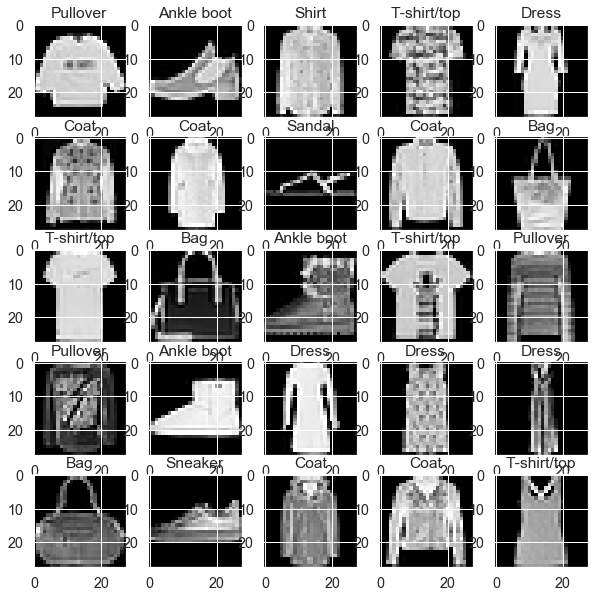

In [14]:
#plot the first 25 items in train set
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    sample=df_train.iloc[i][1:]
    sample=sample.values.reshape(28,28)
    plt.imshow(sample,cmap='gray')
    plt.title(f'{class_names[df_train.iloc[i][0]]}')

Text(0.5, 1.0, 'Number of labels in each category')

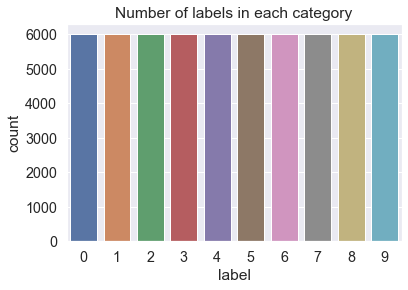

In [15]:
sns.countplot(df_train['label']).set_title('Number of labels in each category')

In [16]:
np_train = np.array(df_train, dtype = 'float32')
np_test = np.array(df_test, dtype='float32')

### Data preprocessing

In [17]:
#Rescale and reshape the data
X_train = np_train[:,1:]/255
y_train = np_train[:,0]
X_test= np_test[:,1:]/255
y_test=np_test[:,0]
image_rows = 28
image_cols = 28
num_classes=10
image_shape = (image_rows,image_cols,1) 
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

### Build the model

In [18]:
model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), 
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')]
    )
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0913 22:31:34.129160 13120 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 22:31:34.175118 13120 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 22:31:34.194658 13120 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 22:31:34.231182 13120 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0913 22:31:34.233177 13120 deprecation_wrapper.py:119] From C:\Users\aliba\Ana

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


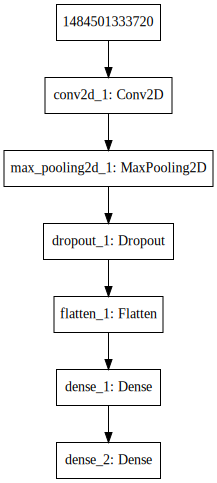

In [21]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [22]:
model.fit(X_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test))

W0913 22:31:59.092892 13120 deprecation.py:323] From C:\Users\aliba\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.5294 - acc: 0.8173 - val_loss: 0.3746 - val_acc: 0.8705
Epoch 2/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.3633 - acc: 0.8737 - val_loss: 0.3205 - val_acc: 0.8908
Epoch 3/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.3269 - acc: 0.8847 - val_loss: 0.2938 - val_acc: 0.8998
Epoch 4/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.3024 - acc: 0.8931 - val_loss: 0.2862 - val_acc: 0.8995
Epoch 5/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.2824 - acc: 0.8999 - val_loss: 0.2726 - val_acc: 0.9040
Epoch 6/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.2685 - acc: 0.9041 - val_loss: 0.2625 - val_acc: 0.9074
Epoch 7/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.2554 - acc: 0.9079 - val_loss: 0.

In [100]:
#pickling the model
with open('img_model.pkl','wb') as f:
    pickle.dump(model,f)

### Make predictions and evaluate

In [29]:
score=model.evaluate(X_test,y_test)
accuracy=score[1]
print (f'Test accuracy: {accuracy}')

10000/10000 [==============================] - 1s 60us/step
Test accuracy: 0.9118
